In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/PUI2015_fbianco/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/tianyigu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df=pd.read_csv ('201506-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

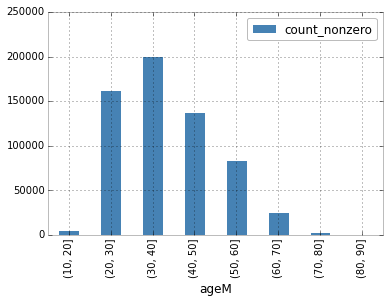

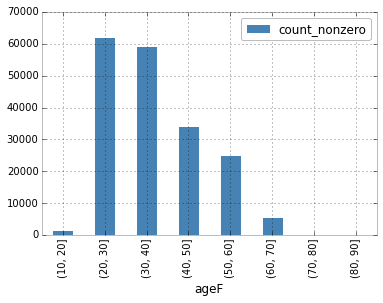

In [4]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.000033
(20, 30]       0.067160
(30, 40]       0.058401
(40, 50]       0.018044
(50, 60]       0.015117
(60, 70]       0.002513
(70, 80]       0.000238
(80, 90]       0.000000


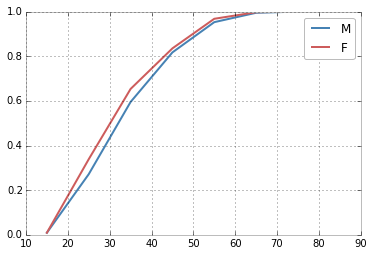

In [5]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [6]:
import scipy.stats

# KS- Test

In [7]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

In [8]:
scipy.stats.ks_2samp(df.ageM, df.ageF)

Ks_2sampResult(statistic=0.45996202796586128, pvalue=0.0)

since the p value = 0, the two samples are not likely to come from the same parent distribution.

# Pearson's Test

In [9]:
ageM1 = df.ageM[~np.isnan(df.ageM)]
ageF1 =df.ageF[~np.isnan(df.ageF)]

In [10]:
size(ageM1),size(ageF1)

(621580, 188655)

In [29]:
agema = pd.DataFrame(ageM1)
agefa = pd.DataFrame(ageF1)

In [39]:
agema1=(list(agema['ageM']))
agefa1=(list(agefa['ageF']))

In [40]:
sizeageM = np.random.choice(agema1,len(agefa1),replace=False)

In [47]:
agema2=list(sizeageM)

In [48]:
scipy.stats.pearsonr(agema2, agefa1)

(0.0014096506815532508, 0.54035911295805772)

Since the correlation of those two samples is 0.0014096...... and the p-value is 0.5403>0.05 the two samples are less likely to be correlated. 

# Spearman's Test

In [50]:
scipy.stats.spearmanr(agema2, agefa1)

SpearmanrResult(correlation=0.0020610015092459798, pvalue=0.37069122375034436)

Since the correlation of those two samples is 0.00206...... and the p-value is 0.3706>0.05 the two samples are less likely to be correlated.

# Day vs Night

In [53]:
df['time'] = pd.to_datetime(df['starttime']).dt.hour


In [55]:
ageday = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['time'] >= 6) & (df['time']<=20))]
agenight = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['time'] > 20) | (df['time']<6))]

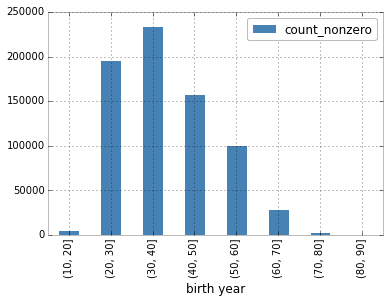

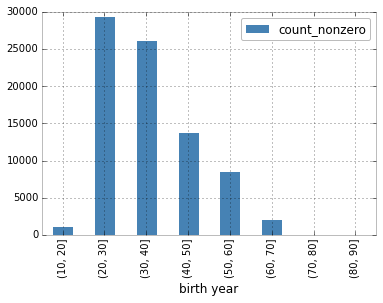

In [59]:
bins = np.arange(10, 99, 10)
ageday.groupby(pd.cut(ageday, bins)).agg([count_nonzero]).plot(kind='bar')
agenight.groupby(pd.cut(agenight, bins)).agg([count_nonzero]).plot(kind='bar')

            count_nonzero
birth year               
(10, 20]         0.006960
(20, 30]         0.098958
(30, 40]         0.098093
(40, 50]         0.049738
(50, 60]         0.017134
(60, 70]         0.003057
(70, 80]         0.000084
(80, 90]         0.000000


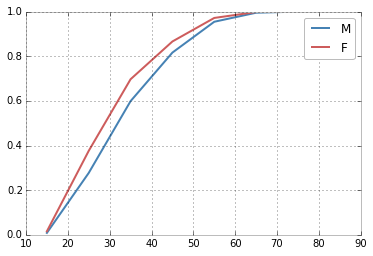

In [60]:
csM=ageday.groupby(pd.cut(ageday, bins)).agg([count_nonzero]).cumsum()

csF=agenight.groupby(pd.cut(agenight, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [64]:
import scipy.stats

# KS Test

In [65]:
ks=scipy.stats.ks_2samp(ageday, agenight)

In [66]:
scipy.stats.ks_2samp(ageday, agenight)

Ks_2sampResult(statistic=0.1130648378711791, pvalue=0.0)

since the p value = 0, the two samples are not likely to come from the same parent distribution.

# Pearson's Test

In [67]:
ageday1 = ageday[~np.isnan(ageday)]
agenight1 =agenight[~np.isnan(agenight)]

In [71]:
size(ageday1),size(agenight1),

(729164, 81663)

In [72]:
ageday2=list(ageday1)
agenight2=list(agenight1)

In [74]:
ageday3= np.random.choice(ageday2,len(agenight2),replace=False)

In [75]:
size(ageday3),size(agenight2),

(81663, 81663)

In [79]:
scipy.stats.pearsonr(ageday3, agenight2)

(0.0040197774425467011, 0.25067625878490962)

Since the correlation of those two samples is 0.0040197...... and the p-value is 0.25067>0.05 the two samples are less likely to be correlated.


# Spearman's Test

In [80]:
scipy.stats.spearmanr(agema2, agefa1)

SpearmanrResult(correlation=0.0020610015092459798, pvalue=0.37069122375034436)

Since the correlation of those two samples is 0.00206...... and the p-value is 0.37069>0.05 the two samples are less likely to be correlated.
